In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams['figure.dpi'] = 300 # 200 e.g. is really fine, but slower


In [17]:
all_files = [f for f in os.listdir('.') if os.path.isfile(f)]

pop = 100
iteration = 100
k_values = [1, 10, 100, 250]
n_values = [1, 10, 250, 750]
GSAfiles = []
GAfiles = []

for k in k_values:
    for n in n_values:
        GSAfiles.append("GSA_iteration_{}_pop_{}_k_{}_n_{}_seed_1234_single.csv".format(iteration,pop,  k,n))


for k in k_values:
    for n in n_values:
        GAfiles.append("ga_iteration_{}_pop_{}_k_{}_n_{}_seed_1234_single.csv".format(iteration+1,pop,  k,n))


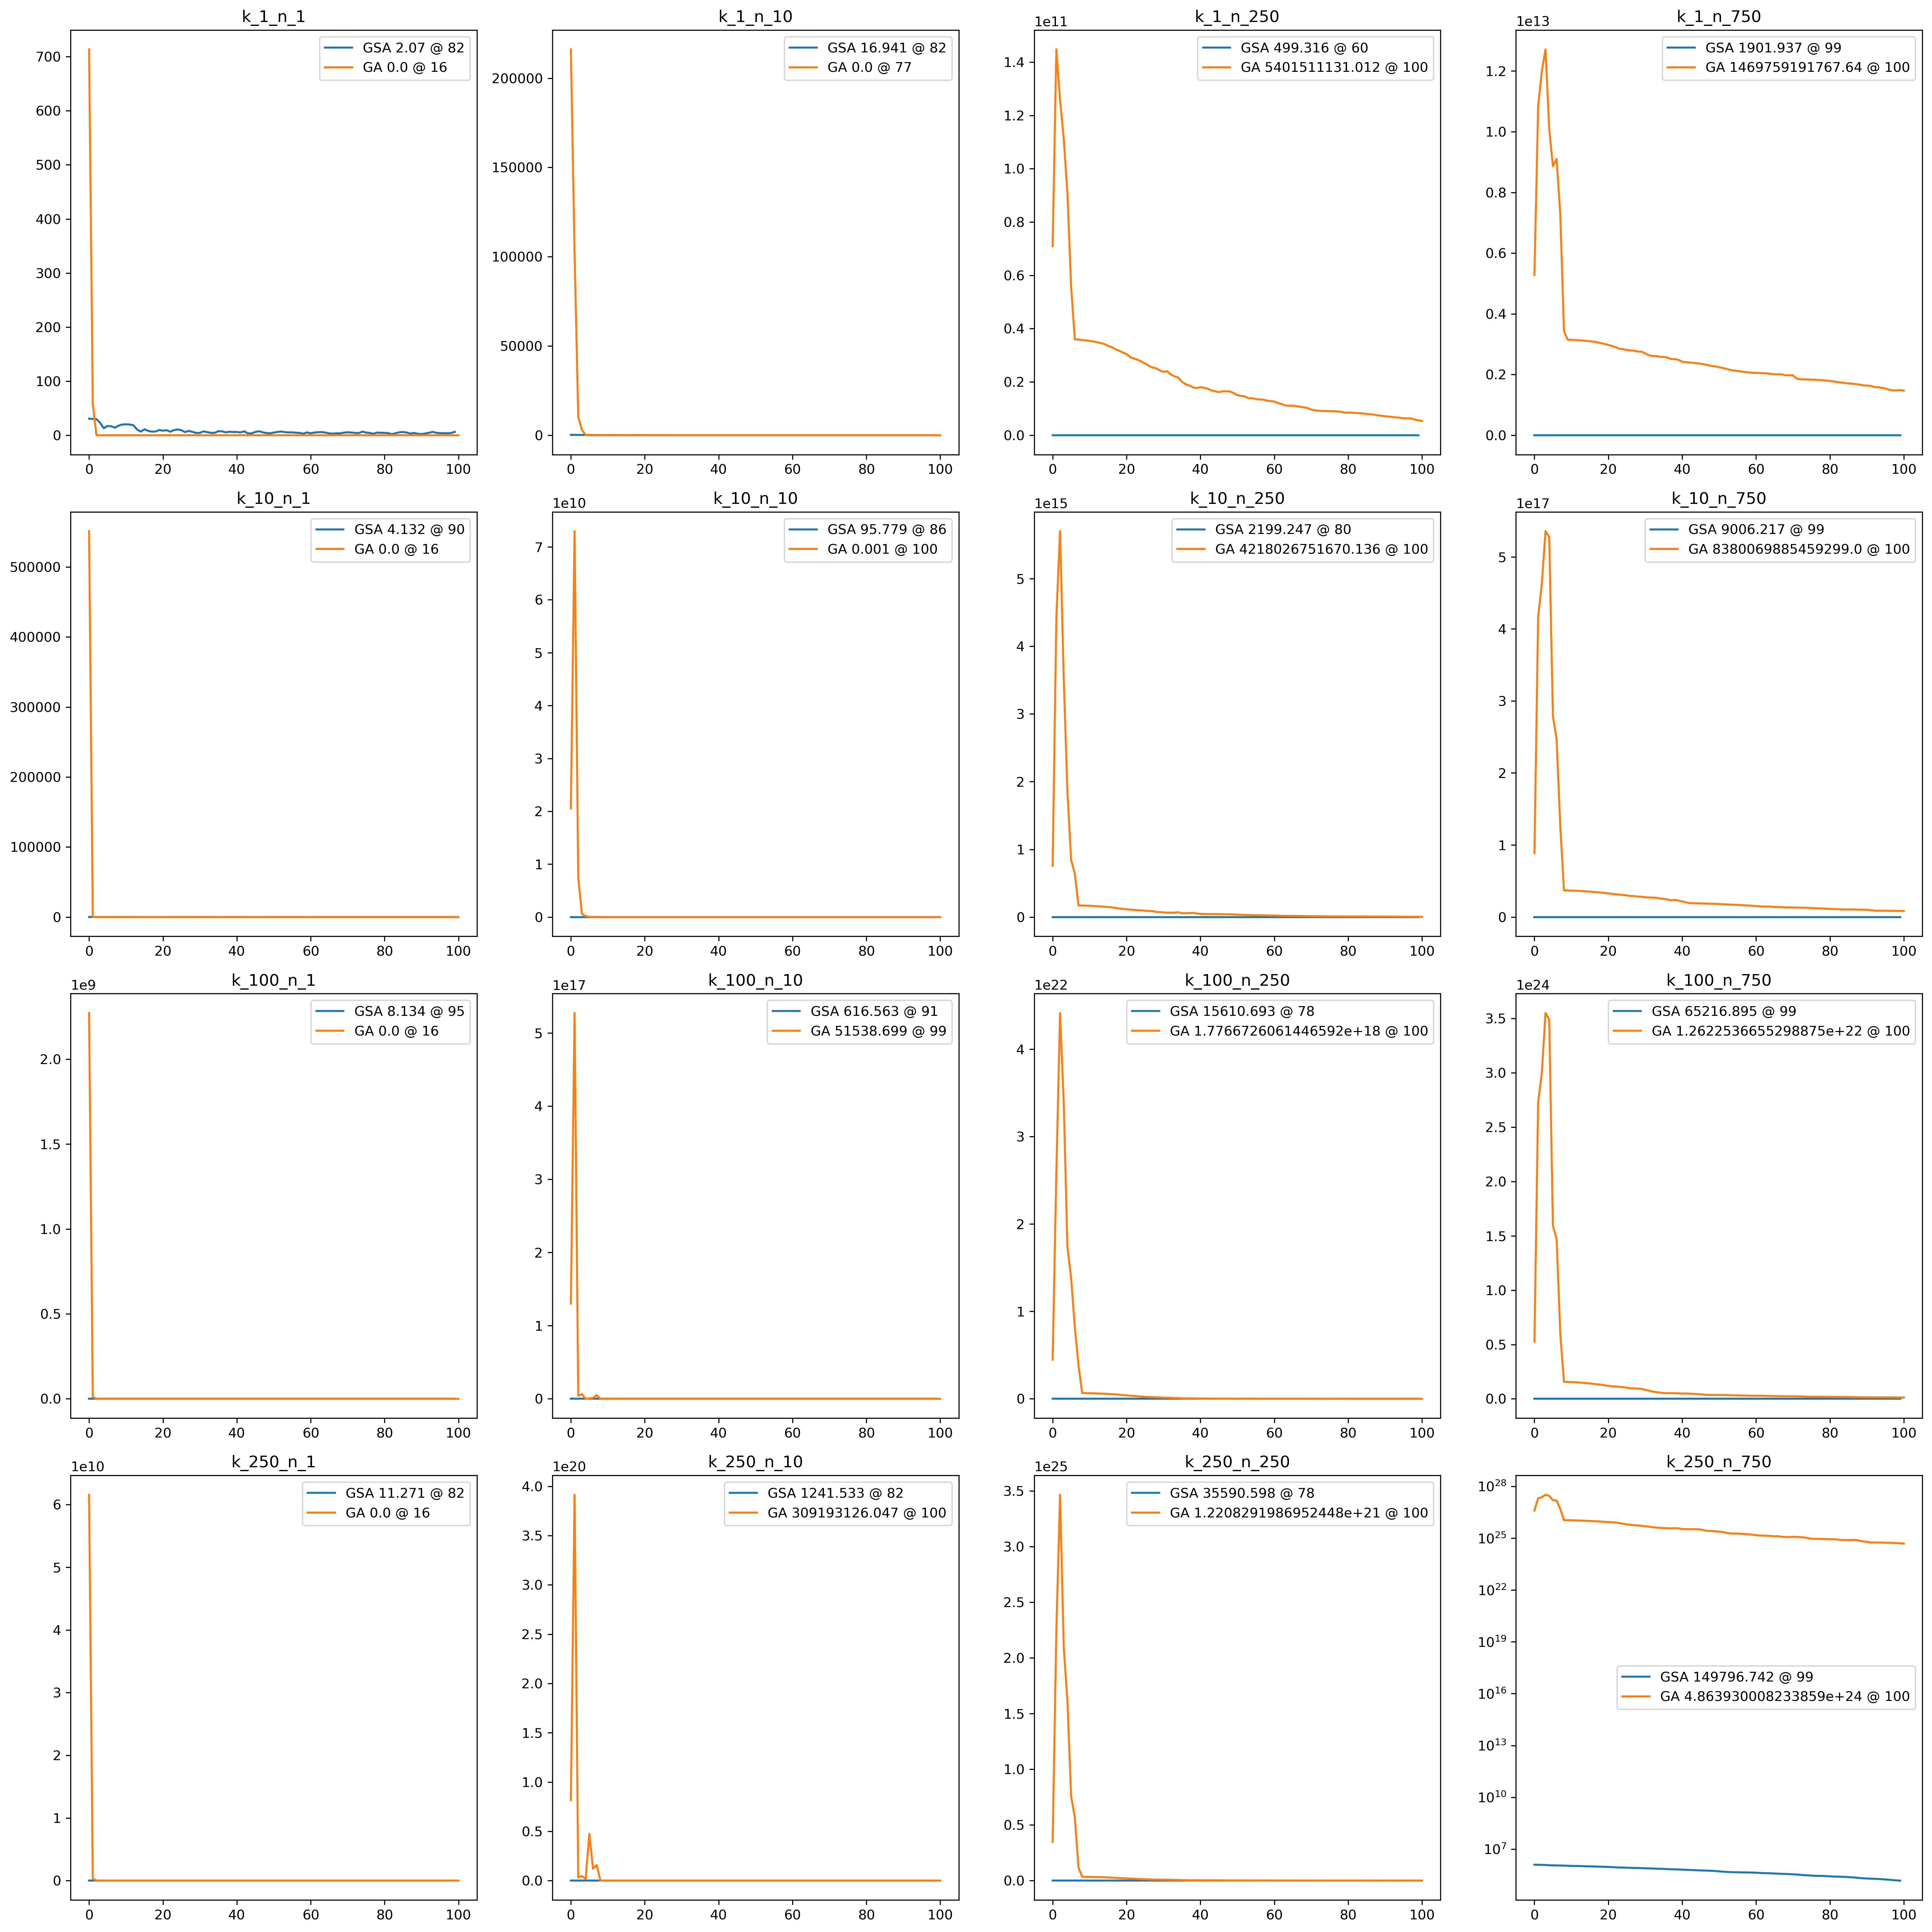

In [19]:
fig1, ax1 = plt.subplots(nrows=len(k_values), ncols=len(n_values))

index = 0
row_index = 0
col_index =0
plt.rcParams['savefig.facecolor']='white'

for row in ax1:
    col_index = 0
    for col in row:
        # title
        ax1[row_index, col_index].set_title(GSAfiles[index][GSAfiles[index].find("pop_")+len(str(pop))+5:GSAfiles[index].find("_seed")])
        
        # gsa data
        GSA_data = pd.read_csv(GSAfiles[index])
        GSA_min_value = min(GSA_data['Average'])
        GSA_min_location = np.where(GSA_data['Average'] == GSA_min_value)[0][0]
        label = "GSA {} @ {}".format(round(GSA_min_value,3), GSA_min_location)
        ax1[row_index, col_index].plot(GSA_data['Average'], label=label)
        
        # gsa data
        GA_data = pd.read_csv(GAfiles[index])
        GA_min_value = min(GA_data['Average'])
        GA_min_location = np.where(GA_data['Average'] == GA_min_value)[0][0]
        label = "GA {} @ {}".format(round(GA_min_value,3), GA_min_location)
        ax1[row_index, col_index].plot(GA_data['Average'], label=label)

        
        #plotting
        ax1[row_index, col_index].legend()
        
        # indexing
        index = index +1
        col_index = col_index + 1
    row_index = row_index + 1
plt.yscale('log')
fig1.tight_layout()
plt.savefig("Analysis_iteration_{}_popsize_{}.png".format(iteration,pop))